# CS 109A/AC 209A/STAT 121A Data Science: Homework 5
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Vocareum Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Verify your submission by checking your submission status on Vocareum!**

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Bassily, Hany

### Part (b): Course Number

CS E-109A

### Part (c): Who did you work with?

None

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Part 1(a).  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.


- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 

  (**Hint:** how do we visually verify that subgroups in a dataset are easily classifiable?)


- Visualize and interpret the principal components. Interpret, also, the corresponding PCA varaiable values.

<font color= 'blue'>
### Solution:
</font>
<br>
For this part we will proceed as follows:
 - Open the dataset and do some inspection and visualization
 - Address the point of why the PCA is a better approach for dimensional reduction than step wise variable selection
 - Execute the selecion of the minimum number of principal components
 - Interpretation of the principal components  and the principal component variables
 
<br>

#### 1. Open Data Set and visualize:

<br>

In [2]:
# Based on Lab 6 Code by Prof. Weiwei Pan

# Importing the data and display main properties:
# -----------------------------------------------

# Read raw data file
data_raw = np.loadtxt('datasets/dataset_1.txt' , delimiter = ',')

# data array shape
print '\n Data array shape    = ', data_raw.shape

# #xtract the features and reponse
features = data_raw[:,:-1]
response = data_raw[:, -1]
print ' \n Data features Shape = ' , features.shape
print ' Data Response Shape = ' , response.shape
print '\n'


 Data array shape    =  (543L, 65L)
 
 Data features Shape =  (543L, 64L)
 Data Response Shape =  (543L,)




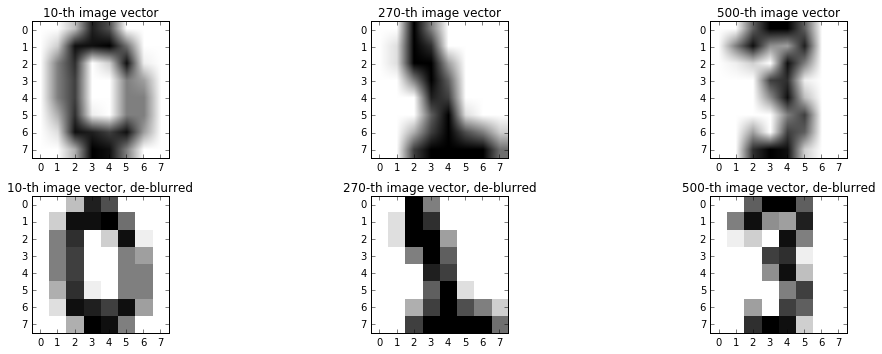

In [3]:
# Visualize some image examples:
# -----------------------------

fig, ax = plt.subplots(2, 3, figsize=(15, 5))
ax[0, 0].imshow(features[10].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 0].set_title('10-th image vector')
ax[0, 1].imshow(features[270].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 1].set_title('270-th image vector')
ax[0, 2].imshow(features[500].reshape(8, 8), cmap=plt.cm.gray_r)
ax[0, 2].set_title('500-th image vector')

ax[1, 0].imshow(features[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 0].set_title('10-th image vector, de-blurred')
ax[1, 1].imshow(features[270].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 1].set_title('270-th image vector, de-blurred')
ax[1, 2].imshow(features[500].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
ax[1, 2].set_title('500-th image vector, de-blurred')

plt.tight_layout()
plt.show()

#### 2. Investigate step-wise variable selection vis a vis the PCA

<br>
For this purpose the following will be executed:
 - Visualize a random selection of two variables
 - Visualize a random selection of three variables
 - Build up a conclusion about the PCA versus the random variable selection

### Part 1(b). Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

### Part 1(c). Build a better one
Asses the quality of your classifier.


- What is the fit (in terms of accuracy or R^2) of your model on the reduced dataset? Visually assess the quality of your classifier by plotting decision surfaces along with the data. Why is visualization of the decision surfaces useful? What does this visualization tell you that a numberical score (like accuracy or R^2) cannot?


- What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does? 

  (**Hint:** make use your analysis in the above; think about what happens when we have to classify 10 classes, 100 classes)
 
 
- Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model.

  (**Hint:** How does ``sklearn``'s Logistic regression module handle multiclass classification?).

## Problem 2. Sentiment Analysis

In this problem, you will explore how to predict the underlying emotional tone of textual data - this task is called sentiment analysis. 

You will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, your goal is to predict if the sentiment expressed in the new post is positive or negative. For this task you should implement a *regularized* logistic regression model.

Produce a report summarizing your solution to this problem:

- Your report should address all decisions you made in the "Data Science Process" (from Lectures #0, #1, #2):

   a. Data collection & cleaning
   
   b. Data exploration
   
   c. Modeling
   
   d. Analysis  
   
   e. Visualization and presentation  


- Your report should be informative and accessible to a **general audience with no assumed formal training in mathematics, statistics or computer science**.


- The exposition in your report, not including code, visualization and output, should be at least three paragraphs in length (you are free to write more, but you're not required to).

Structure your presentation and exposition like a professional product that can be submitted to a client and or your supervisor at work.

## Challenge Problem: Automated Medical Diagnosis

In this problem, you are going to build a model to diagnose heart disease. 

The training set is provided in the file ``dataset_3_train.txt`` and there are two test sets: ``dataset_3_test_1.txt`` and ``dataset_3_test_2.txt``. Each patient in the datasets is described by 5 biomarkers extracted from cardiac SPECT images; the last column in each dataset contains the disease diagnosis (1 indicates that the patient is normal, and 0 indicates that the patient suffers from heart disease).

- Fit a logistic regression model to the training set, and report its accuracy on both the test sets. 


- Is your accuracy rate meaningful or reliable? How comfortable would you be in using your predictions to diagnose real living patients? Justify your answers. 

  (**Hint:** How does the performance of your model compare with a classifier that lumps all patients into the same class?)


- Let's call the logistic regression model you learned, ${C}_1$. Your colleague suggests that you can get higher accuracies for this task by using a threshold of 0.05 on the Logistic regression model to predict labels instead of the usual threshold of 0.5, i.e. use a classifier that predicts 1 when $\widehat{P}(Y = 1\,|\, X) \geq 0.05$ and 0 otherwise. Let's call this classifier ${C}_2$. Does ${C}_2$ perform better the two test sets - that is, which one would you rather use for automated diagnostics? Support your conclusion with careful analysis. 


- Generalize your analysis of these two classifiers. Under what general conditions does $C_2$ perform better than ${C}_1$? Support your conclusion with a mathematical proof or simulation


**Hint:** You were told in class that a classifier that predicts 1 when $\widehat{P}(Y = 1 \,|\, X) \geq 0.5$, and 0 otherwise, is the Bayes classifier. This classifier minimizes the classification error rate. What can you say about a classifier that uses a threshold other than $0.5$? Is it the Bayes classifier for a different loss function?


**Hint:** For the first three parts, you might find it useful to analyze the conditional accuracy on each class.